In [1]:
from image_data_quality.image_dataset import Imagelab
from PIL import Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
import glob

In [2]:
# ! pip install cifar2png
# ! cifar2png cifar10 ./cifar10png --name-with-batch-index

In [9]:
def display_results(files, topk=5):
    for i, f in enumerate(files[:topk]):
        display(Image(os.path.join(f)))

In [4]:
pd.set_option('display.max_rows', 20)

In [5]:
dataset_path = "./cifar10png/*/*/"

In [6]:
imagelab = Imagelab(dataset_path)
print(f"Number of images: {str(len(imagelab.image_files))}")

Number of images: 60000


In [7]:
issues = imagelab.evaluate()
imagelab.aggregate()
summary, results_df = imagelab.summary()

Checking for DarkImages, AspectRatio, Entropy, Grayscale, Duplicated, Blurred, NearDuplicates, LightImages


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60000/60000 [02:16<00:00, 438.65it/s]


Color spaces in the  dataset
{'RGB': 60000}

Issue Summary
                Issues  Percent of Data  Issue Intensity
NearDuplicates    1420             2.37         0.488981
DarkImages         805             1.34         0.277204
Grayscale          668             1.11         0.230028
LightImages          6             0.01         0.002066
Blurred              4             0.01         0.001377
Entropy              1             0.00         0.000344
AspectRatio          0             0.00         0.000000
Duplicated           0             0.00         0.000000



# Dark Images

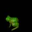

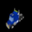

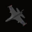

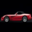

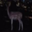

In [10]:
sorted_df = results_df.sort_values(by=[f'DarkImages score'])
files =list(sorted_df[sorted_df[f'DarkImages bool'] == True]['image_name'])
display_results(files)

## Grayscale Images

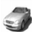

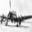

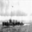

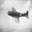

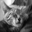

In [11]:
sorted_df = results_df.sort_values(by=[f'Grayscale score'])
files =list(sorted_df[sorted_df[f'Grayscale bool'] == True]['image_name'])
display_results(files)

## Blurred images

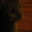

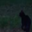

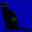

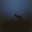

In [12]:
sorted_df = results_df.sort_values(by=[f'Blurred score'])
files =list(sorted_df[sorted_df[f'Blurred bool'] == True]['image_name'])
display_results(files)

## Skewed aspect ratio

In [13]:
sorted_df = results_df.sort_values(by=[f'AspectRatio score'])
files =list(sorted_df[sorted_df[f'AspectRatio bool'] == True]['image_name'])
display_results(files)

## Light Images

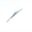

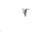

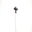

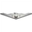

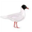

In [14]:
sorted_df = results_df.sort_values(by=[f'LightImages score'])
files =list(sorted_df[sorted_df[f'LightImages bool'] == True]['image_name'])
display_results(files)

## Low Entropy

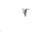

In [15]:
sorted_df = results_df.sort_values(by=[f'Entropy score'])
files =list(sorted_df[sorted_df[f'Entropy bool'] == True]['image_name'])
display_results(files)

## Near Duplicates

In [17]:
for manager in imagelab.issue_managers:
    if manager.issue_name == 'NearDuplicates':
        duplicate_sets = manager.get_duplicated_sets()

0


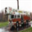

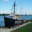

1


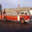

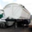

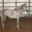

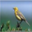

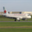

2


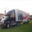

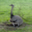

3


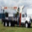

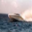

4


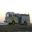

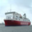

In [18]:
for i, s in enumerate(duplicate_sets):
    print(i)
    display_results(s)

## Duplicates

In [19]:
for manager in imagelab.issue_managers:
    if manager.issue_name == 'Duplicated':
        duplicate_sets = manager.get_duplicated_sets()

In [20]:
for i, s in enumerate(duplicate_sets):
    print(i)
    display_results(s)